In [ ]:
# Install required packages (only once per session)
!pip install seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


In [ ]:
# Upload the dataset from your system
from google.colab import files
uploaded = files.upload()

Saving adult 3.csv to adult 3.csv


In [ ]:
# Load the uploaded CSV file
df = pd.read_csv("Employee_Dataset.csv")

# Display the first few rows
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [ ]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']

In [ ]:
print(df.isnull().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2799
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [ ]:
# Fill missing categorical values with mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

/tmp/ipython-input-9-139061255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
/tmp/ipython-input-9-139061255.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48811 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48811 non-null  int64 
 1   workclass        48811 non-null  object
 2   fnlwgt           48811 non-null  int64 
 3   education        48811 non-null  object
 4   educational-num  48811 non-null  int64 
 5   marital-status   48811 non-null  object
 6   occupation       48811 non-null  object
 7   relationship     48811 non-null  object
 8   race             48811 non-null  object
 9   gender           48811 non-null  object
 10  capital-gain     48811 non-null  int64 
 11  capital-loss     48811 non-null  int64 
 12  hours-per-week   48811 non-null  int64 
 13  native-country   48811 non-null  object
 14  income           48811 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
df = df[df['education'] != '5th-6th']
df = df[df['education'] != '1st-4th']
df = df[df['education'] != 'Preschool']


In [ ]:
df.shape


(47972, 15)

In [ ]:
#redundancy
#categorical value should be not prefered
df.drop(columns='education',inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

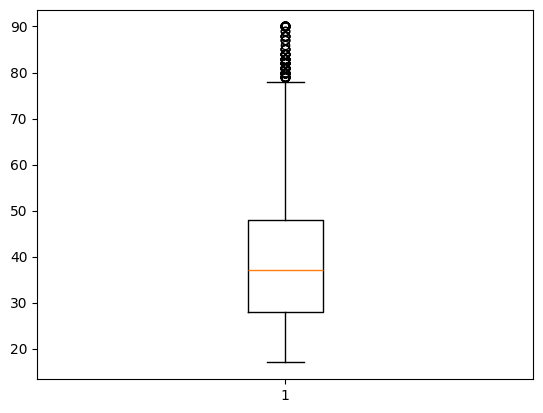

In [ ]:
#outliers
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show

In [ ]:
df = df[(df['age']<=75) & (df['age']>=17) ]

<function matplotlib.pyplot.show(close=None, block=None)>

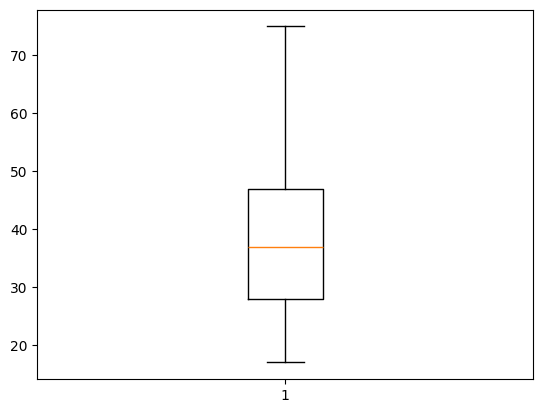

In [ ]:
plt.boxplot(df['age'])
plt.show

In [ ]:
df.shape

(47619, 14)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()


df['workclass'] = encoder.fit_transform(df['workclass'])

df['marital-status'] = encoder.fit_transform(df['marital-status'])

df['occupation'] = encoder.fit_transform(df['occupation'])

df['relationship'] = encoder.fit_transform(df['relationship'])

df['race'] = encoder.fit_transform(df['race'])

df['gender'] = encoder.fit_transform(df['gender'])

df['native-country'] = encoder.fit_transform(df['native-country'])

df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,>50K
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,2,103497,10,4,9,3,4,0,0,0,30,38,<=50K


In [ ]:
# Feature set
x = df.drop(columns=['income'])  # Input features

# Target variable
y = df['income']                 # Output label (classification)

In [ ]:
df.shape


(47619, 14)

In [ ]:
# Convert income column to binary (<=50K: 0, >50K: 1)
df['income'] = df['income'].apply(lambda x: 1 if x == ' >50K' or x == '>50K' else 0)

In [ ]:
X = df.drop(columns=['income'])
y = df['income']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

# Balance the data
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled, y)

# Check class distribution
print(pd.Series(y_bal).value_counts())

income
0    36029
1    36029
Name: count, dtype: int64


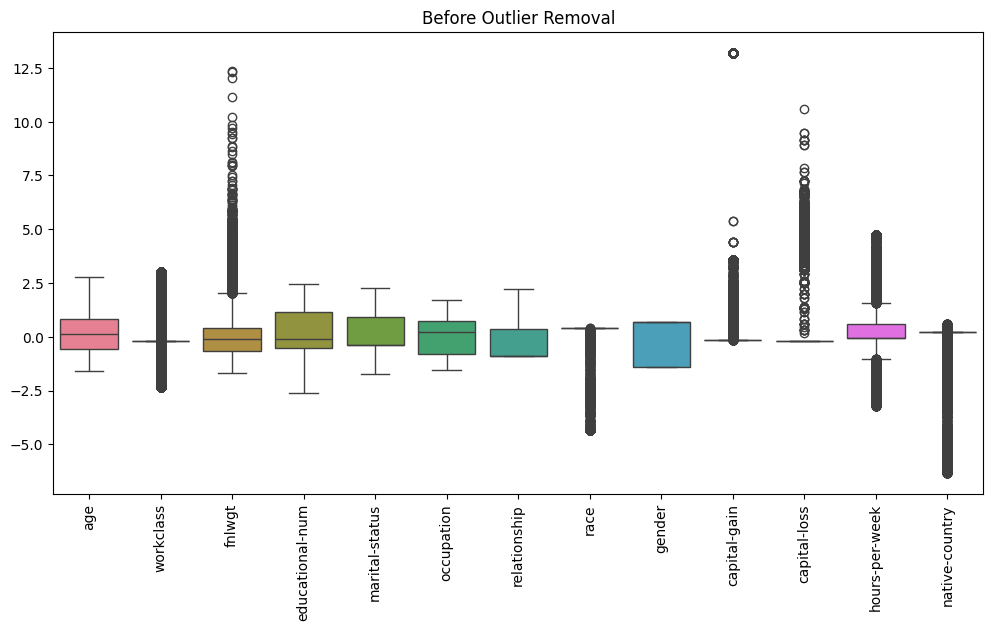

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot before outlier removal
plt.figure(figsize=(12,6))
sns.boxplot(data=pd.DataFrame(X_bal, columns=X.columns))
plt.title("Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()

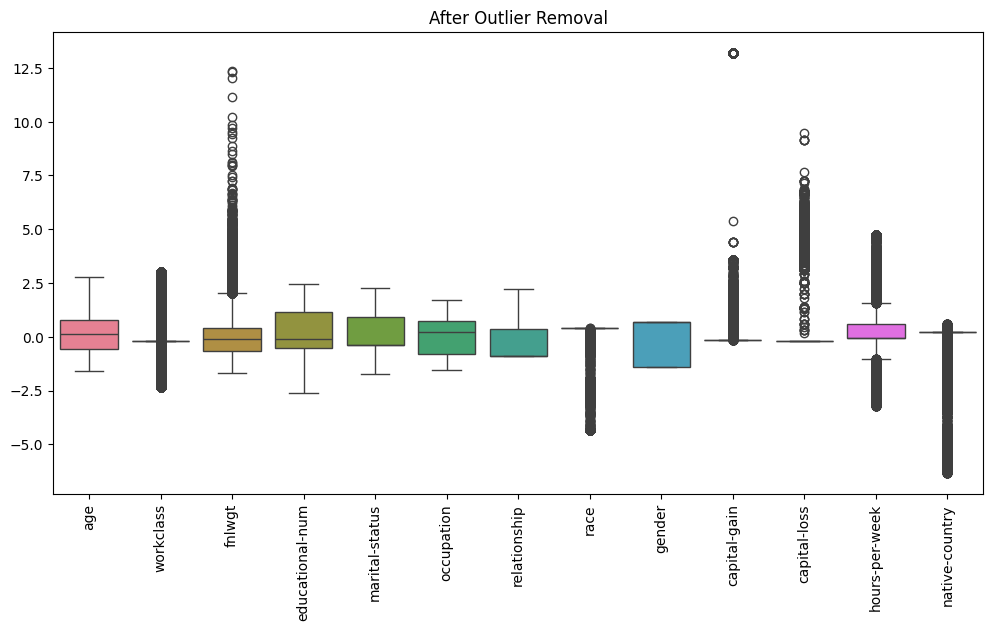

In [ ]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest
iso = IsolationForest(contamination=0.02)
outliers = iso.fit_predict(X_bal)

# Keep only non-outliers
mask = outliers != -1
X_clean = X_bal[mask]
y_clean = y_bal[mask]
plt.figure(figsize=(12,6))
sns.boxplot(data=pd.DataFrame(X_clean, columns=X.columns))
plt.title("After Outlier Removal")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

print("Training size:", len(X_train))
print("Testing size:", len(X_test))

Training size: 56492
Testing size: 14124


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Dictionary to store accuracy
accuracies = {}

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
accuracies['Logistic Regression'] = accuracy_score(y_test, log_pred)

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
accuracies['KNN'] = accuracy_score(y_test, knn_pred)

# 3. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
accuracies['SVM'] = accuracy_score(y_test, svm_pred)

# 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)

# 5. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
accuracies['Gradient Boosting'] = accuracy_score(y_test, gb_pred)

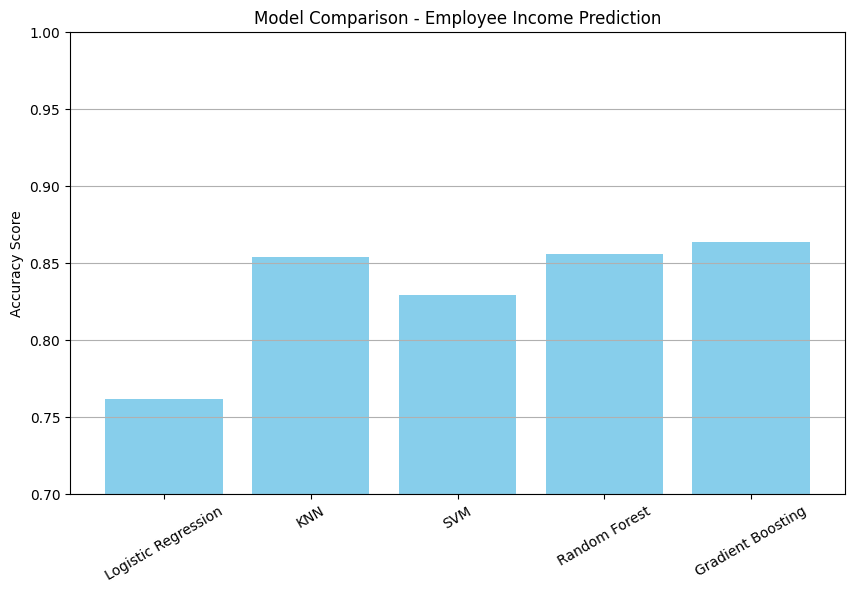

In [ ]:
# Bar graph of accuracies
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylim(0.7, 1.0)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison - Employee Income Prediction")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

In [ ]:
print("Logistic Regression:\n", classification_report(y_test, log_pred))
print("KNN:\n", classification_report(y_test, knn_pred))
print("SVM:\n", classification_report(y_test, svm_pred))
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("Gradient Boosting:\n", classification_report(y_test, gb_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      7030
           1       0.77      0.76      0.76      7094

    accuracy                           0.76     14124
   macro avg       0.76      0.76      0.76     14124
weighted avg       0.76      0.76      0.76     14124

KNN:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      7030
           1       0.81      0.92      0.86      7094

    accuracy                           0.85     14124
   macro avg       0.86      0.85      0.85     14124
weighted avg       0.86      0.85      0.85     14124

SVM:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      7030
           1       0.79      0.89      0.84      7094

    accuracy                           0.83     14124
   macro avg       0.83      0.83      0.83     14124
weighted avg       0.83      0.83      0

In [ ]:
!pip install xgboost lightgbm catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
accuracies = {}

# 1. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
accuracies['XGBoost'] = accuracy_score(y_test, xgb_pred)

# 2. LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
accuracies['LightGBM'] = accuracy_score(y_test, lgb_pred)

# 3. CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
accuracies['CatBoost'] = accuracy_score(y_test, cat_pred)

# 4. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
accuracies['Gradient Boosting'] = accuracy_score(y_test, gb_pred)

# 5. Random Forest (baseline)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28313, number of negative: 28179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 56492, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501186 -> initscore=0.004744
[LightGBM] [Info] Start training from score 0.004744


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


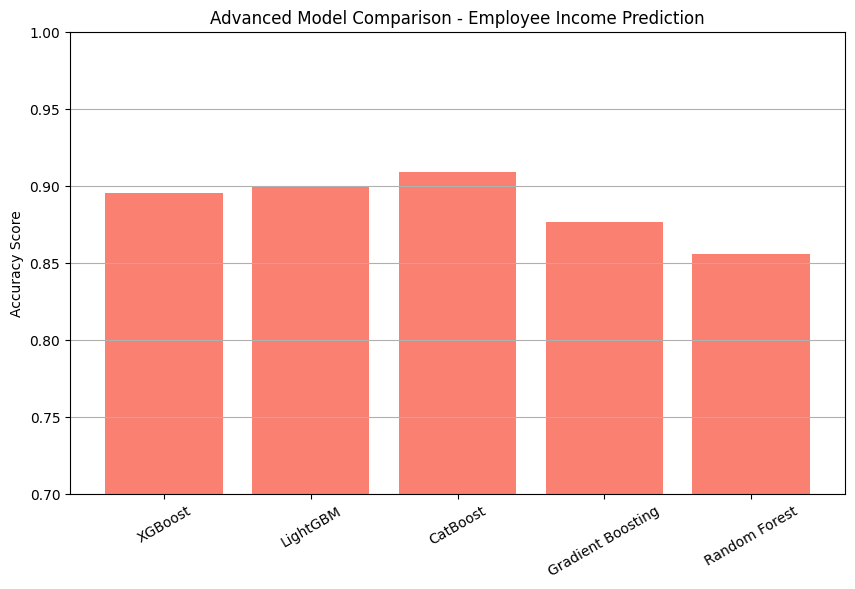

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='salmon')
plt.ylim(0.7, 1.0)
plt.ylabel("Accuracy Score")
plt.title("Advanced Model Comparison - Employee Income Prediction")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

In [ ]:
print("XGBoost:\n", classification_report(y_test, xgb_pred))
print("LightGBM:\n", classification_report(y_test, lgb_pred))
print("CatBoost:\n", classification_report(y_test, cat_pred))
print("Gradient Boosting:\n", classification_report(y_test, gb_pred))
print("Random Forest:\n", classification_report(y_test, rf_pred))

XGBoost:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      7030
           1       0.89      0.90      0.90      7094

    accuracy                           0.90     14124
   macro avg       0.90      0.90      0.90     14124
weighted avg       0.90      0.90      0.90     14124

LightGBM:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      7030
           1       0.90      0.91      0.90      7094

    accuracy                           0.90     14124
   macro avg       0.90      0.90      0.90     14124
weighted avg       0.90      0.90      0.90     14124

CatBoost:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7030
           1       0.92      0.90      0.91      7094

    accuracy                           0.91     14124
   macro avg       0.91      0.91      0.91     14124
weighted avg       0.91      0.91      0.9

In [ ]:
from catboost import CatBoostClassifier
import joblib

# Train the model
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Export model
import joblib
joblib.dump(cat_model, "catboost_model.pkl")


['catboost_model.pkl']